In [9]:
import random


from matplotlib import pyplot as plt

from Model.Inference import analyze_iou_across_images, get_summary
from Visualizer.Model import display_best_grid_prediction
from Model.zoo import UNetModel1024
from Visualizer.Grid import display_grid_from_path

from utils.data import iou_to_dataframe

In [4]:
model = UNetModel1024(weights="../../Model/zoo/weights/unet-1024-7030.weights.h5")
model = model.load_model()
output_dir = "../../CROPS"
image_idx = 10
mask_threshold = 0.5
grid_range = (4, 10)
random.seed(42)
index_range = [random.randint(0, 797) for _ in range(50)]

2025-07-21 15:50:28.329538: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 268435456 exceeds 10% of free system memory.
2025-07-21 15:50:28.452676: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 268435456 exceeds 10% of free system memory.
2025-07-21 15:50:31.527269: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 268435456 exceeds 10% of free system memory.
2025-07-21 15:50:32.273611: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 268435456 exceeds 10% of free system memory.
2025-07-21 15:50:32.392725: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 536870912 exceeds 10% of free system memory.


Grid size 4x4: IoU = 0.6588
Grid size 5x5: IoU = 0.6086
Grid size 6x6: IoU = 0.6757
Grid size 7x7: IoU = 0.4312
Grid size 8x8: IoU = 0.3381
Grid size 9x9: IoU = 0.3005
Grid size 10x10: IoU = 0.1823

Best grid size: 6x6 with IoU = 0.6757
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step


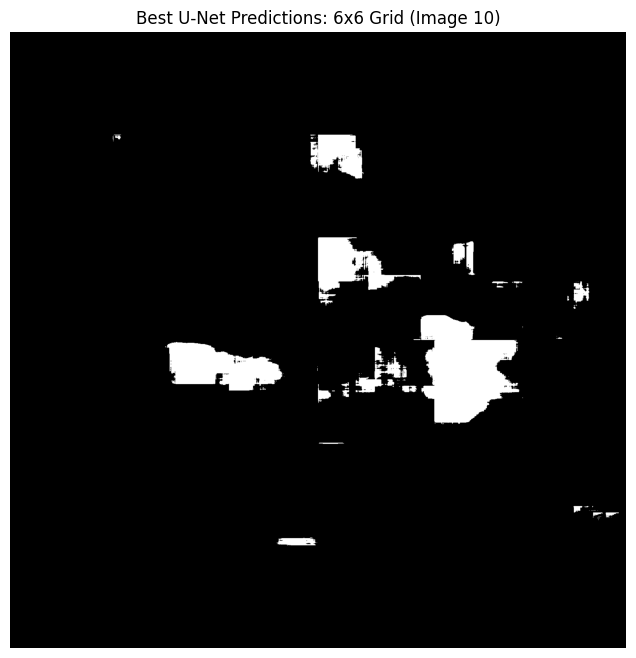

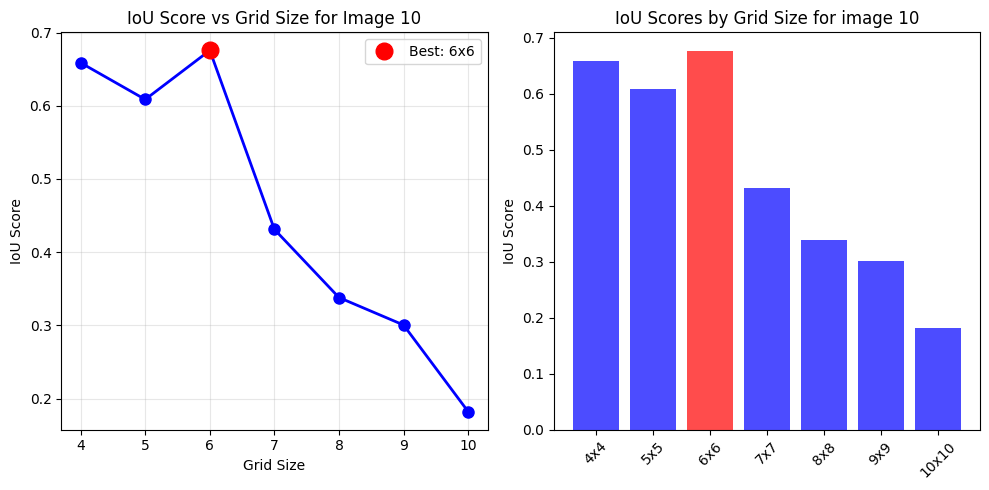

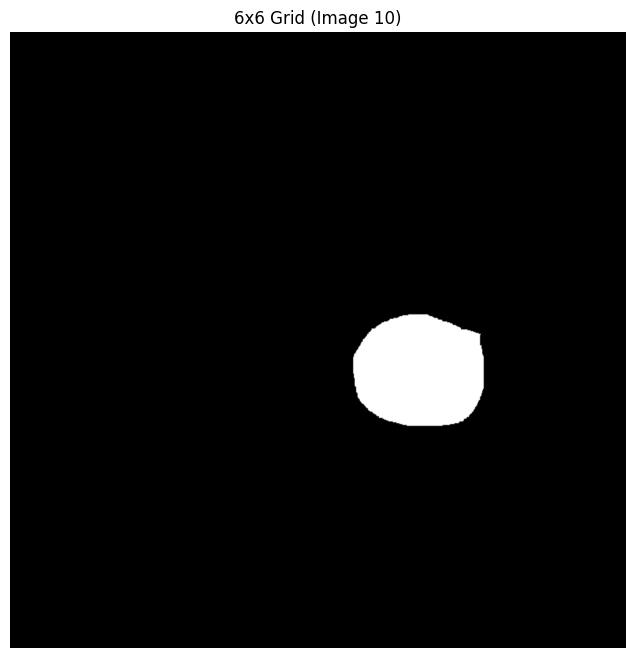

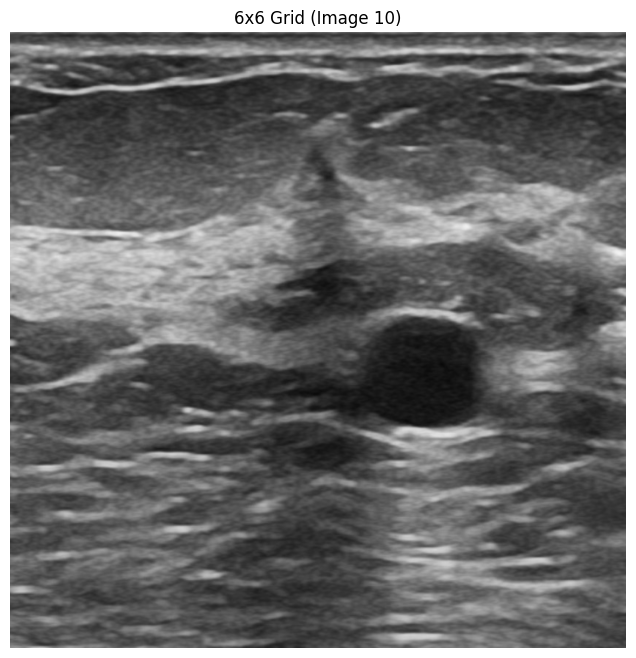

In [3]:

best_grid_size, iou_scores = display_best_grid_prediction(
    output_dir=output_dir,
    image_idx=image_idx,
    model=model,
    mask_threshold=mask_threshold,
    spacing=0,
    grid_range=grid_range
)

display_grid_from_path(output_dir, image_idx, best_grid_size, True, 0)
display_grid_from_path(output_dir, image_idx, best_grid_size, False, 0)

In [7]:
results = analyze_iou_across_images(
    output_dir=output_dir,
    model=model,
    mask_threshold=mask_threshold,
    grid_range=grid_range,
    index_range=index_range
)

Processing image 1/50... Grid size 4x4: IoU = 0.4115
Grid size 5x5: IoU = 0.4745
Grid size 6x6: IoU = 0.4694
Grid size 7x7: IoU = 0.4832
Grid size 8x8: IoU = 0.4363
Grid size 9x9: IoU = 0.4186
Grid size 10x10: IoU = 0.4070

Best grid size: 7x7 with IoU = 0.4832
✓ Best: 7x7 (IoU: 0.4832)
Processing image 2/50... Grid size 4x4: IoU = 0.3004
Grid size 5x5: IoU = 0.4798
Grid size 6x6: IoU = 0.4759
Grid size 7x7: IoU = 0.4260
Grid size 8x8: IoU = 0.3501
Grid size 9x9: IoU = 0.2593
Grid size 10x10: IoU = 0.2059

Best grid size: 5x5 with IoU = 0.4798
✓ Best: 5x5 (IoU: 0.4798)
Processing image 3/50... Grid size 4x4: IoU = 0.1746
Grid size 5x5: IoU = 0.2052
Grid size 6x6: IoU = 0.1101
Grid size 7x7: IoU = 0.1472
Grid size 8x8: IoU = 0.2050
Grid size 9x9: IoU = 0.0915
Grid size 10x10: IoU = 0.0898

Best grid size: 5x5 with IoU = 0.2052
✓ Best: 5x5 (IoU: 0.2052)
Processing image 4/50... Grid size 4x4: IoU = 0.4375
Grid size 5x5: IoU = 0.4800
Grid size 6x6: IoU = 0.4722
Grid size 7x7: IoU = 0.4082

In [10]:
df = iou_to_dataframe(results, index_range)
df

,image_idx,grid_size,iou_score,is_best,best_iou_for_image,best_grid_for_image
0,654,4,0.411462,False,0.483180,7
1,654,5,0.474501,False,0.483180,7
2,654,6,0.469440,False,0.483180,7
3,654,7,0.483180,True,0.483180,7
4,654,8,0.436283,False,0.483180,7
...,...,...,...,...,...,...
331,99,6,0.298515,False,0.511666,4
332,99,7,0.304512,False,0.511666,4
333,99,8,0.260739,False,0.511666,4
334,99,9,0.185451,False,0.511666,4


In [11]:
stats = get_summary(results)
stats

,grid_size,mean_iou,std_iou,min_iou,max_iou,median_iou
0,4,0.357302,0.161692,0.000000,0.771963,0.338619
1,5,0.369832,0.148436,0.080000,0.859511,0.342288
2,6,0.337549,0.137275,0.055556,0.688470,0.320935
3,7,0.301077,0.142661,0.020611,0.658686,0.302981
4,8,0.255830,0.130228,0.017160,0.594815,0.242957
5,9,0.207110,0.123471,0.021444,0.537910,0.185832
6,10,0.174659,0.110067,0.000000,0.457563,0.155307


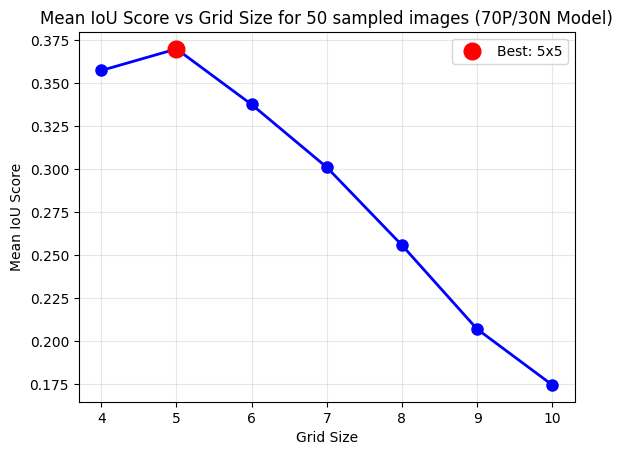

In [13]:
df_sorted = stats.sort_values('grid_size')
grid_sizes = df_sorted['grid_size'].tolist()
mean_ious = df_sorted['mean_iou'].tolist()

plt.plot(grid_sizes, mean_ious, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Grid Size')
plt.ylabel('Mean IoU Score')
plt.title(f'Mean IoU Score vs Grid Size for {len(index_range)} sampled images (70P/30N Model)')
plt.grid(True, alpha=0.3)
plt.xticks(grid_sizes)

# Highlight best grid size
best_idx = df_sorted['mean_iou'].idxmax()
best_grid_size = df_sorted.loc[best_idx, 'grid_size']
best_mean_iou = df_sorted.loc[best_idx, 'mean_iou']

plt.plot(best_grid_size, best_mean_iou, 'ro', markersize=12,
         label=f'Best: {best_grid_size}x{best_grid_size}')
plt.legend()
plt.show()